# Hessians and Concavity

Now we can explore one of the most important applications of the Hessian matrix in optimization. Recall that for a function of one variable, the **second derivative test** helps us determine if a point with a zero-slope tangent is a local minimum or maximum.

* If $f''(x) > 0$, the function is **concave up** (like a happy face 😊), and the point is a **local minimum**.
* If $f''(x) < 0$, the function is **concave down** (like a sad face 😞), and the point is a **local maximum**.

The Hessian matrix provides the exact same information for functions of multiple variables, but instead of checking the sign of a single number, we check the signs of the Hessian's **eigenvalues**.

---
## Case 1: Concave Up (Local Minimum)

A function of two variables is **concave up** if its graph looks like a bowl or a paraboloid opening upwards. If we find a point where the gradient is zero and the function is concave up, that point must be a **local minimum**.

**The Test:** A function is concave up if **all** the eigenvalues of its Hessian matrix are **positive**. A matrix with this property is called **positive-definite**.

**Example:** $f(x, y) = 2x^2 + 3y^2 - xy$
* **Hessian:** $H = \begin{bmatrix} 4 & -1 \\ -1 & 6 \end{bmatrix}$
* **Eigenvalues:** Solving the characteristic equation, we find $\lambda_1 \approx 6.41$ and $\lambda_2 \approx 3.59$.
* **Conclusion:** Since both eigenvalues are positive, the function is concave up, and the point `(0, 0)` (where the gradient is zero) is a local minimum.

---
## Case 2: Concave Down (Local Maximum)

A function is **concave down** if its graph looks like a dome opening downwards. If the gradient is zero at a point and the function is concave down, that point is a **local maximum**.

**The Test:** A function is concave down if **all** the eigenvalues of its Hessian matrix are **negative**. This is called a **negative-definite** matrix.

**Example:** $f(x, y) = -2x^2 - 3y^2 - xy + 15$
* **Hessian:** $H = \begin{bmatrix} -4 & -1 \\ -1 & -6 \end{bmatrix}$
* **Eigenvalues:** $\lambda_1 \approx -6.41$ and $\lambda_2 \approx -3.59$.
* **Conclusion:** Since both eigenvalues are negative, the function is concave down, and the point `(0, 0)` is a local maximum.

---
## Case 3: Saddle Point

What if the eigenvalues have mixed signs? This occurs at a **saddle point**, which is neither a minimum nor a maximum. From one direction it looks like a minimum, and from another, it looks like a maximum.

**The Test:** If the Hessian has both **positive and negative eigenvalues**, the critical point is a **saddle point**.

**Example:** $f(x, y) = 2x^2 - 2y^2$
* **Hessian:** $H = \begin{bmatrix} 4 & 0 \\ 0 & -4 \end{bmatrix}$
* **Eigenvalues:** $\lambda_1 = 4$ and $\lambda_2 = -4$.
* **Conclusion:** Since the eigenvalues have mixed signs, the point `(0, 0)` is a saddle point.

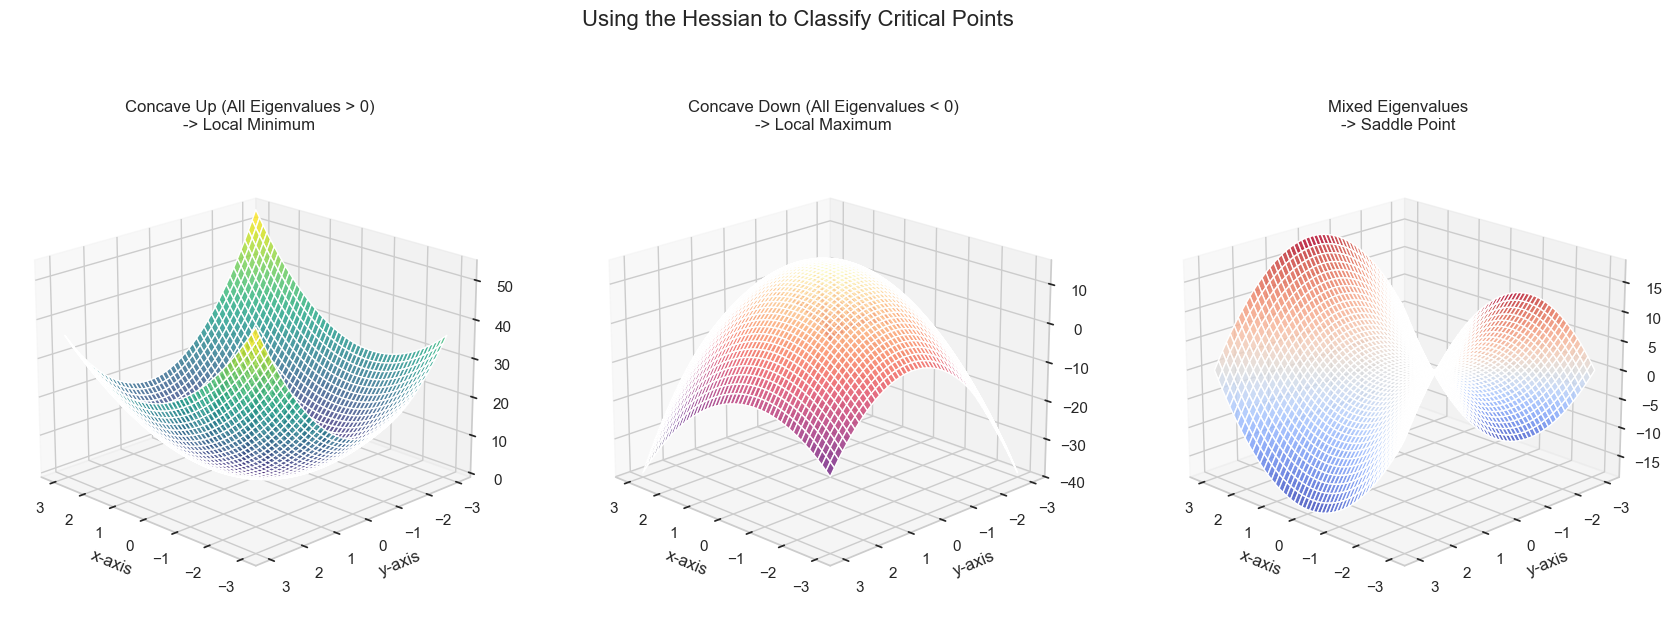

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Create data for the plots ---
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)

# --- Define the functions ---
Z_min = 2*X**2 + 3*Y**2 - X*Y       # Concave Up (Minimum)
Z_max = -2*X**2 - 3*Y**2 - X*Y + 15 # Concave Down (Maximum)
Z_saddle = 2*X**2 - 2*Y**2          # Saddle Point

# --- Create the visualizations ---
fig = plt.figure(figsize=(21, 7))
fig.suptitle('Using the Hessian to Classify Critical Points', fontsize=16, y=1.02)

# --- Plot 1: Local Minimum ---
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, Z_min, cmap='viridis', alpha=0.8)
ax1.set_title('Concave Up (All Eigenvalues > 0)\n-> Local Minimum')

# --- Plot 2: Local Maximum ---
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(X, Y, Z_max, cmap='magma', alpha=0.8)
ax2.set_title('Concave Down (All Eigenvalues < 0)\n-> Local Maximum')

# --- Plot 3: Saddle Point ---
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, Z_saddle, cmap='coolwarm', alpha=0.8)
ax3.set_title('Mixed Eigenvalues\n-> Saddle Point')


# --- Format all plots ---
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.view_init(elev=20, azim=135)

plt.show()

---

## Summary: The Second Derivative Test

This table summarizes the test for finding local minima and maxima at a point `c` where the first derivative (or gradient) is zero.

| Dimension | Local Minimum | Local Maximum | Inconclusive |
| :--- | :--- | :--- | :--- |
| **One Variable** | $f''(c) > 0$ | $f''(c) < 0$ | $f''(c) = 0$ |
| **N-Variables** | All eigenvalues of the Hessian are **positive**. | All eigenvalues of the Hessian are **negative**. | Eigenvalues have mixed signs or some are zero. |